In [29]:
# importação necessaria

import bs4 as bs                        # tratamento de dados HTML
import urllib                           # manipulação de HTML
import spacy                            # linguagem natural
from IPython.core.display import HTML   # linguagem HTML na saida(display)

In [30]:
# carregando lib em portugues

pln = spacy.load('pt_core_news_sm')
pln

In [31]:
# link para busca

link ='https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial'

In [32]:
# download de dados HTML da pag

dados = urllib.request.urlopen(link)

In [33]:
# leitura 

dados = dados.read()

In [34]:
# tratamento com beautifulsoup

dados_html = bs.BeautifulSoup(dados, 'lxml')
dados_html

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"4d8db188-1a4f-4f92-b0fa-e3dbce01ab3b","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Inteligência_artificial","wgTitle":"Inteligência artificial","wgCurRevisionId":63537927,"wgRevisionId":63537927,"wgArticleId":12722,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!Páginas com erros em referências","!CS1 inglês-fontes em língua (en)","!CS1 manut: Nomes múltip

In [35]:
# quantidade de paragrafos

paragrafos = dados_html.find_all('p')
len(paragrafos)

106

In [36]:
# extração apenas do texto dos paragrafos 

conteudo = ''
for p in paragrafos:
    conteudo += p.text

conteudo

'\n\t\tPáginas para editores conectados saiba mais\nInteligência artificial (por vezes mencionada pela sigla em português IA ou pela sigla em inglês AI - artificial intelligence) é a inteligência demonstrada por máquinas ao executar tarefas complexas associadas a seres inteligentes[1], além de também ser um campo de estudo acadêmico.[2]\nO principal objetivo dos sistemas de IA, é executar funções que, caso um ser humano fosse executar, seriam consideradas inteligentes. É um conceito amplo, e que recebe tantas definições quanto damos significados diferentes à palavra inteligência.[3] Podemos pensar em algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos de forma que no futuro agirá de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de 

In [37]:
# tranformação em minuscula

conteudo = conteudo.lower()
conteudo

'\n\t\tpáginas para editores conectados saiba mais\ninteligência artificial (por vezes mencionada pela sigla em português ia ou pela sigla em inglês ai - artificial intelligence) é a inteligência demonstrada por máquinas ao executar tarefas complexas associadas a seres inteligentes[1], além de também ser um campo de estudo acadêmico.[2]\no principal objetivo dos sistemas de ia, é executar funções que, caso um ser humano fosse executar, seriam consideradas inteligentes. é um conceito amplo, e que recebe tantas definições quanto damos significados diferentes à palavra inteligência.[3] podemos pensar em algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos de forma que no futuro agirá de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de 

In [38]:
# importações
# definição das cores

from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'red', 'green', 'magenta'])

In [39]:
# layout das cores

from wordcloud import WordCloud
cloud = WordCloud(background_color='white', max_words=100, colormap=color_map)

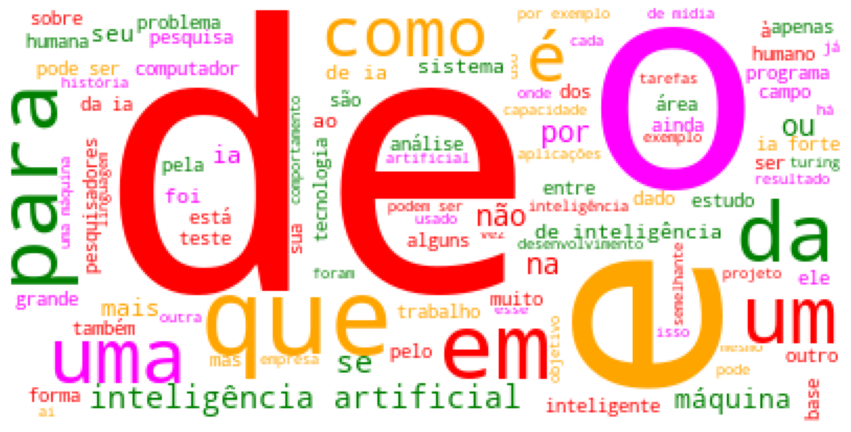

In [40]:
# visualização da nuvem de palavra

import matplotlib.pyplot as plt
cloud = cloud.generate(conteudo)
plt.figure(figsize=(15, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [41]:
# tratamento de stopwords
# palavras que não são tão relevantes para o contexto

In [42]:
from spacy.lang.pt import STOP_WORDS

In [43]:
# remoção das stop_word no conteudo

print(pln.vocab['usa'].is_stop)           # palavra stop_word 
print(pln.vocab['inteligente'].is_stop)   # palavra não stop_word

True
False


In [44]:
# adição das palavras do conteudo em uma lista para 

doc = pln(conteudo)
lista_token = []
for word in doc:
    lista_token.append(word.text)

lista_token

['\n\t\t',
 'páginas',
 'para',
 'editores',
 'conectados',
 'saiba',
 'mais',
 '\n',
 'inteligência',
 'artificial',
 '(',
 'por',
 'vezes',
 'mencionada',
 'pela',
 'sigla',
 'em',
 'português',
 'ia',
 'ou',
 'pela',
 'sigla',
 'em',
 'inglês',
 'ai',
 '-',
 'artificial',
 'intelligence',
 ')',
 'é',
 'a',
 'inteligência',
 'demonstrada',
 'por',
 'máquinas',
 'ao',
 'executar',
 'tarefas',
 'complexas',
 'associadas',
 'a',
 'seres',
 'inteligentes[1',
 ']',
 ',',
 'além',
 'de',
 'também',
 'ser',
 'um',
 'campo',
 'de',
 'estudo',
 'acadêmico.[2',
 ']',
 '\n',
 'o',
 'principal',
 'objetivo',
 'dos',
 'sistemas',
 'de',
 'ia',
 ',',
 'é',
 'executar',
 'funções',
 'que',
 ',',
 'caso',
 'um',
 'ser',
 'humano',
 'fosse',
 'executar',
 ',',
 'seriam',
 'consideradas',
 'inteligentes',
 '.',
 'é',
 'um',
 'conceito',
 'amplo',
 ',',
 'e',
 'que',
 'recebe',
 'tantas',
 'definições',
 'quanto',
 'damos',
 'significados',
 'diferentes',
 'à',
 'palavra',
 'inteligência.[3',
 ']',
 'p

In [45]:
# remoção das stop_words

sem_stops = []
for palavras in lista_token:
    if pln.vocab[palavras].is_stop ==False:
        sem_stops.append(palavras)

sem_stops

['\n\t\t',
 'páginas',
 'editores',
 'conectados',
 'saiba',
 '\n',
 'inteligência',
 'artificial',
 '(',
 'mencionada',
 'sigla',
 'português',
 'ia',
 'sigla',
 'inglês',
 'ai',
 '-',
 'artificial',
 'intelligence',
 ')',
 'inteligência',
 'demonstrada',
 'máquinas',
 'executar',
 'tarefas',
 'complexas',
 'associadas',
 'seres',
 'inteligentes[1',
 ']',
 ',',
 'campo',
 'estudo',
 'acadêmico.[2',
 ']',
 '\n',
 'principal',
 'objetivo',
 'sistemas',
 'ia',
 ',',
 'executar',
 'funções',
 ',',
 'caso',
 'humano',
 'fosse',
 'executar',
 ',',
 'seriam',
 'consideradas',
 'inteligentes',
 '.',
 'conceito',
 'amplo',
 ',',
 'recebe',
 'tantas',
 'definições',
 'damos',
 'significados',
 'diferentes',
 'palavra',
 'inteligência.[3',
 ']',
 'podemos',
 'pensar',
 'características',
 'básicas',
 'desses',
 'sistemas',
 ',',
 'capacidade',
 'raciocínio',
 '(',
 'aplicar',
 'regras',
 'lógicas',
 'conjunto',
 'dados',
 'disponíveis',
 'chegar',
 'conclusão',
 ')',
 ',',
 'aprendizagem',
 '(',

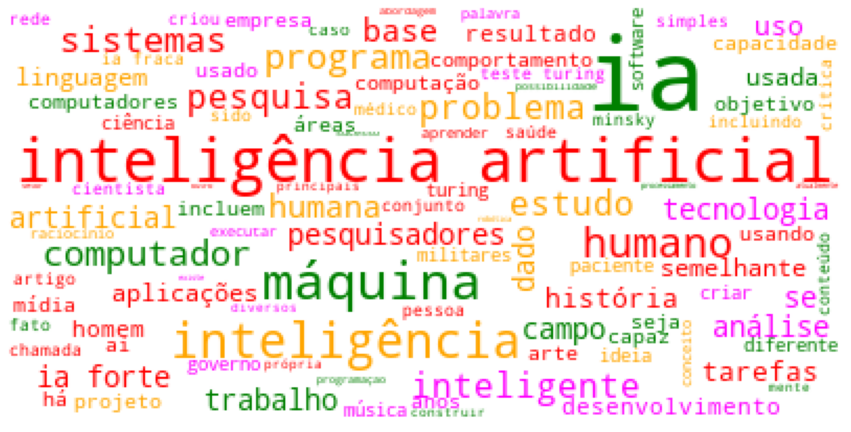

In [46]:
# visualização da nuvem sem as stop_words

import matplotlib.pyplot as plt
cloud = cloud.generate(' '.join(sem_stops))
plt.figure(figsize=(15, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()